In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
Listings=pd.read_csv("FDNY_Firehouse_Listing_20231115.csv")

In [3]:
Listings.head()

,FacilityName,FacilityAddress,Borough,Postcode,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,Engine 4/Ladder 15,42 South Street,Manhattan,10005,40.703694,-74.007717,101,1,7,1000867,1000350001,Battery Park City-Lower Manhattan
1,Engine 6,49 Beekman Street,Manhattan,10038,40.709971,-74.005395,101,1,1501,1001287,1000930030,Battery Park City-Lower Manhattan
2,Manhattan Borough Command/Battalion 1/Engine 7...,100 Duane Street,Manhattan,10007,40.715339,-74.006300,101,1,33,1001647,1001500025,SoHo-TriBeCa-Civic Center-Little Italy
3,Ladder 8,14 N. Moore Street,Manhattan,10013,40.719574,-74.006620,101,1,33,1002150,1001890035,SoHo-TriBeCa-Civic Center-Little Italy
4,Engine 9/Ladder 6,75 Canal Street,Manhattan,10002,40.715408,-73.992834,103,1,16,1003898,1003000030,Chinatown


In [4]:
Listings.columns

Index(['FacilityName', 'FacilityAddress', 'Borough', 'Postcode', 'Latitude',
       'Longitude', 'Community Board', 'Community Council ', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [5]:
Listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FacilityName        219 non-null    object 
 1   FacilityAddress     219 non-null    object 
 2   Borough             219 non-null    object 
 3   Postcode            219 non-null    int64  
 4   Latitude            219 non-null    float64
 5   Longitude           219 non-null    float64
 6   Community Board     219 non-null    int64  
 7   Community Council   219 non-null    int64  
 8   Census Tract        219 non-null    int64  
 9   BIN                 219 non-null    int64  
 10  BBL                 219 non-null    int64  
 11  NTA                 219 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 20.7+ KB


In [6]:
Listings=Listings.drop(['Community Board', 'Community Council ', 'Census Tract',
       'BIN', 'BBL', 'NTA'], axis=1)

In [7]:
Listings.shape

(219, 6)

In [8]:
Listings.isnull().sum()

FacilityName       0
FacilityAddress    0
Borough            0
Postcode           0
Latitude           0
Longitude          0
dtype: int64

In [9]:
Listings.duplicated().sum()

0

In [10]:
Listings.head()

,FacilityName,FacilityAddress,Borough,Postcode,Latitude,Longitude
0,Engine 4/Ladder 15,42 South Street,Manhattan,10005,40.703694,-74.007717
1,Engine 6,49 Beekman Street,Manhattan,10038,40.709971,-74.005395
2,Manhattan Borough Command/Battalion 1/Engine 7...,100 Duane Street,Manhattan,10007,40.715339,-74.006300
3,Ladder 8,14 N. Moore Street,Manhattan,10013,40.719574,-74.006620
4,Engine 9/Ladder 6,75 Canal Street,Manhattan,10002,40.715408,-73.992834


In [11]:
Listings['FacilityName'].nunique()

219

In [12]:
Listings['FacilityAddress'].nunique()

219

In [13]:
Listings['Borough'].value_counts()

Borough
Brooklyn         66
Queens           51
Manhattan        48
Bronx            34
Staten Island    20
Name: count, dtype: int64

In [14]:
Listings.to_csv('Listings_cleaned.csv', sep=',', index=False)

In [15]:
Responded=pd.read_csv("Incidents_Responded_to_by_Fire_Companies_20231115.csv", low_memory=False)

In [16]:
Responded.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
0,55672688,2147,"300 - Rescue, EMS incident, other",01/01/2013 12:00:20 AM,01/01/2013 12:14:23 AM,1.0,01/01/2013 12:20:06 AM,"1 - More than initial alarm, less than Signal 7-5",1186.0,"00 - Action taken, other",...,10454,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55672692,0818,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:00:37 AM,01/01/2013 12:09:03 AM,3.0,01/01/2013 12:30:06 AM,"1 - More than initial alarm, less than Signal 7-5",1769.0,86 - Investigate,...,10036,1 - Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55672693,9656,"300 - Rescue, EMS incident, other",01/01/2013 12:01:17 AM,01/01/2013 12:04:55 AM,1.0,01/01/2013 12:15:18 AM,"1 - More than initial alarm, less than Signal 7-5",841.0,"00 - Action taken, other",...,11418,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55672695,7412,412 - Gas leak (natural gas or LPG),01/01/2013 12:02:32 AM,01/01/2013 12:07:48 AM,4.0,01/01/2013 12:40:11 AM,"1 - More than initial alarm, less than Signal 7-5",2259.0,44 - Hazardous materials leak control & contai...,...,11103,5 - Queens,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55672697,4019,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:01:49 AM,01/01/2013 12:06:27 AM,6.0,01/01/2013 12:24:56 AM,"1 - More than initial alarm, less than Signal 7-5",1387.0,86 - Investigate,...,11385,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
Responded.columns

Index(['IM_INCIDENT_KEY', 'FIRE_BOX', 'INCIDENT_TYPE_DESC',
       'INCIDENT_DATE_TIME', 'ARRIVAL_DATE_TIME', 'UNITS_ONSCENE',
       'LAST_UNIT_CLEARED_DATE_TIME', 'HIGHEST_LEVEL_DESC',
       'TOTAL_INCIDENT_DURATION', 'ACTION_TAKEN1_DESC', 'ACTION_TAKEN2_DESC',
       'ACTION_TAKEN3_DESC', 'PROPERTY_USE_DESC', 'STREET_HIGHWAY', 'ZIP_CODE',
       'BOROUGH_DESC', 'FLOOR', 'CO_DETECTOR_PRESENT_DESC',
       'FIRE_ORIGIN_BELOW_GRADE_FLAG', 'STORY_FIRE_ORIGIN_COUNT',
       'FIRE_SPREAD_DESC', 'DETECTOR_PRESENCE_DESC', 'AES_PRESENCE_DESC',
       'STANDPIPE_SYS_PRESENT_FLAG'],
      dtype='object')

In [57]:
Responded = Responded.rename(columns={"INCIDENT_DATE_TIME": "Incident_DateTime"})

In [58]:
Responded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3963975 entries, 0 to 4158390
Data columns (total 12 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   FIRE_BOX                     object 
 1   INCIDENT_TYPE_DESC           object 
 2   Incident_DateTime            object 
 3   ARRIVAL_DATE_TIME            object 
 4   UNITS_ONSCENE                float64
 5   LAST_UNIT_CLEARED_DATE_TIME  object 
 6   HIGHEST_LEVEL_DESC           object 
 7   TOTAL_INCIDENT_DURATION      float64
 8   ACTION_TAKEN1_DESC           object 
 9   STREET_HIGHWAY               object 
 10  ZIP_CODE                     object 
 11  BOROUGH_DESC                 object 
dtypes: float64(2), object(10)
memory usage: 393.2+ MB


In [19]:
Responded.shape

(4158392, 24)

In [20]:
Responded.count()

IM_INCIDENT_KEY                 4158392
FIRE_BOX                        4158377
INCIDENT_TYPE_DESC              4158392
INCIDENT_DATE_TIME              4158392
ARRIVAL_DATE_TIME               4045963
UNITS_ONSCENE                   4045471
LAST_UNIT_CLEARED_DATE_TIME     4157915
HIGHEST_LEVEL_DESC              4158179
TOTAL_INCIDENT_DURATION         4157664
ACTION_TAKEN1_DESC              4158392
ACTION_TAKEN2_DESC               902131
ACTION_TAKEN3_DESC               389683
PROPERTY_USE_DESC               4158386
STREET_HIGHWAY                  4116365
ZIP_CODE                        4158376
BOROUGH_DESC                    4158392
FLOOR                            882413
CO_DETECTOR_PRESENT_DESC          54583
FIRE_ORIGIN_BELOW_GRADE_FLAG       3060
STORY_FIRE_ORIGIN_COUNT           21628
FIRE_SPREAD_DESC                  21626
DETECTOR_PRESENCE_DESC            21625
AES_PRESENCE_DESC                 21625
STANDPIPE_SYS_PRESENT_FLAG        21631
dtype: int64

In [21]:
Responded.isnull().sum()

IM_INCIDENT_KEY                       0
FIRE_BOX                             15
INCIDENT_TYPE_DESC                    0
INCIDENT_DATE_TIME                    0
ARRIVAL_DATE_TIME                112429
UNITS_ONSCENE                    112921
LAST_UNIT_CLEARED_DATE_TIME         477
HIGHEST_LEVEL_DESC                  213
TOTAL_INCIDENT_DURATION             728
ACTION_TAKEN1_DESC                    0
ACTION_TAKEN2_DESC              3256261
ACTION_TAKEN3_DESC              3768709
PROPERTY_USE_DESC                     6
STREET_HIGHWAY                    42027
ZIP_CODE                             16
BOROUGH_DESC                          0
FLOOR                           3275979
CO_DETECTOR_PRESENT_DESC        4103809
FIRE_ORIGIN_BELOW_GRADE_FLAG    4155332
STORY_FIRE_ORIGIN_COUNT         4136764
FIRE_SPREAD_DESC                4136766
DETECTOR_PRESENCE_DESC          4136767
AES_PRESENCE_DESC               4136767
STANDPIPE_SYS_PRESENT_FLAG      4136761
dtype: int64

In [22]:
Responded=Responded.drop(['ACTION_TAKEN2_DESC','ACTION_TAKEN3_DESC','FLOOR','CO_DETECTOR_PRESENT_DESC',
       'FIRE_ORIGIN_BELOW_GRADE_FLAG', 'STORY_FIRE_ORIGIN_COUNT',
       'FIRE_SPREAD_DESC', 'DETECTOR_PRESENCE_DESC', 'AES_PRESENCE_DESC',
       'STANDPIPE_SYS_PRESENT_FLAG', 'IM_INCIDENT_KEY','PROPERTY_USE_DESC'], axis=1)

In [23]:
Responded.isnull().sum()

FIRE_BOX                           15
INCIDENT_TYPE_DESC                  0
INCIDENT_DATE_TIME                  0
ARRIVAL_DATE_TIME              112429
UNITS_ONSCENE                  112921
LAST_UNIT_CLEARED_DATE_TIME       477
HIGHEST_LEVEL_DESC                213
TOTAL_INCIDENT_DURATION           728
ACTION_TAKEN1_DESC                  0
STREET_HIGHWAY                  42027
ZIP_CODE                           16
BOROUGH_DESC                        0
dtype: int64

In [24]:
Responded=Responded.dropna()

In [25]:
Responded.isnull().sum()

FIRE_BOX                       0
INCIDENT_TYPE_DESC             0
INCIDENT_DATE_TIME             0
ARRIVAL_DATE_TIME              0
UNITS_ONSCENE                  0
LAST_UNIT_CLEARED_DATE_TIME    0
HIGHEST_LEVEL_DESC             0
TOTAL_INCIDENT_DURATION        0
ACTION_TAKEN1_DESC             0
STREET_HIGHWAY                 0
ZIP_CODE                       0
BOROUGH_DESC                   0
dtype: int64

In [26]:
Responded.duplicated().sum()

7907

In [27]:
Responded=Responded.drop_duplicates()

In [28]:
Responded.duplicated().sum()

0

In [29]:
Responded.shape

(3997108, 12)

In [30]:
Responded["INCIDENT_DATE_TIME"].duplicated().sum()

33133

In [31]:
Responded = Responded.drop_duplicates(subset=['INCIDENT_DATE_TIME'])

In [32]:
Responded["INCIDENT_DATE_TIME"].duplicated().sum()

0

In [33]:
Responded.shape

(3963975, 12)

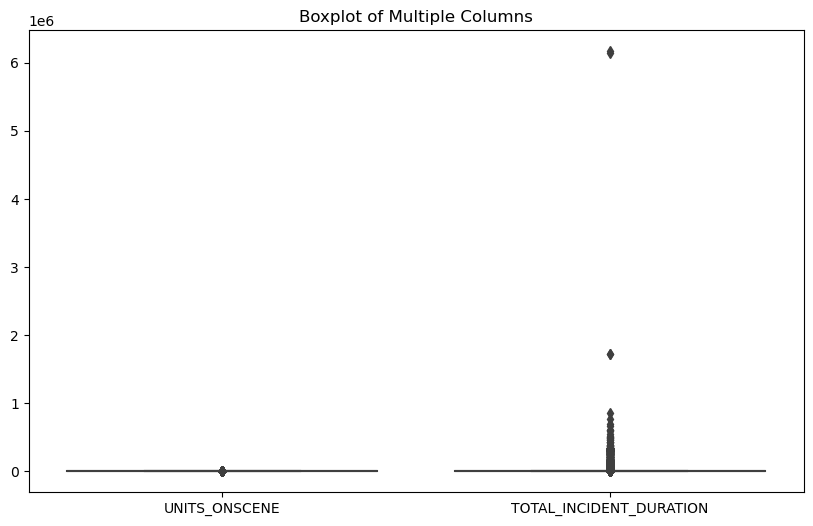

In [34]:
# Create a boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=Responded)
plt.title('Boxplot of Multiple Columns')
plt.show()

In [35]:
Responded.shape

(3963975, 12)

In [36]:
Responded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3963975 entries, 0 to 4158390
Data columns (total 12 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   FIRE_BOX                     object 
 1   INCIDENT_TYPE_DESC           object 
 2   INCIDENT_DATE_TIME           object 
 3   ARRIVAL_DATE_TIME            object 
 4   UNITS_ONSCENE                float64
 5   LAST_UNIT_CLEARED_DATE_TIME  object 
 6   HIGHEST_LEVEL_DESC           object 
 7   TOTAL_INCIDENT_DURATION      float64
 8   ACTION_TAKEN1_DESC           object 
 9   STREET_HIGHWAY               object 
 10  ZIP_CODE                     object 
 11  BOROUGH_DESC                 object 
dtypes: float64(2), object(10)
memory usage: 393.2+ MB


In [37]:
Responded.head()

,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,STREET_HIGHWAY,ZIP_CODE,BOROUGH_DESC
0,2147,"300 - Rescue, EMS incident, other",01/01/2013 12:00:20 AM,01/01/2013 12:14:23 AM,1.0,01/01/2013 12:20:06 AM,"1 - More than initial alarm, less than Signal 7-5",1186.0,"00 - Action taken, other",E 138 ST,10454,2 - Bronx
1,0818,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:00:37 AM,01/01/2013 12:09:03 AM,3.0,01/01/2013 12:30:06 AM,"1 - More than initial alarm, less than Signal 7-5",1769.0,86 - Investigate,W 46 ST,10036,1 - Manhattan
2,9656,"300 - Rescue, EMS incident, other",01/01/2013 12:01:17 AM,01/01/2013 12:04:55 AM,1.0,01/01/2013 12:15:18 AM,"1 - More than initial alarm, less than Signal 7-5",841.0,"00 - Action taken, other",116 ST,11418,5 - Queens
3,7412,412 - Gas leak (natural gas or LPG),01/01/2013 12:02:32 AM,01/01/2013 12:07:48 AM,4.0,01/01/2013 12:40:11 AM,"1 - More than initial alarm, less than Signal 7-5",2259.0,44 - Hazardous materials leak control & contai...,43 ST,11103,5 - Queens
4,4019,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:01:49 AM,01/01/2013 12:06:27 AM,6.0,01/01/2013 12:24:56 AM,"1 - More than initial alarm, less than Signal 7-5",1387.0,86 - Investigate,WYCKOFF AVE,11385,5 - Queens


In [38]:
Responded.to_csv('Responded_cleaned.csv', sep=',', index=False)

In [39]:
Causes=pd.read_csv("Bureau_of_Fire_Investigations_-_Fire_Causes_20231115.csv")

In [40]:
Causes.head()

,Case_Year,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
0,2016,01/01/2016 12:08:00 AM,Queens,50,08,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,2016,01/01/2016 12:13:00 AM,Staten Island,21,02,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,2016,01/01/2016 12:21:00 AM,Queens,37,05,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,2016,01/01/2016 12:29:00 AM,Bronx,15,12,047,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,2016,01/01/2016 12:32:00 AM,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary


In [41]:
Causes=Causes.drop(['Case_Year','Community_District','Precinct'], axis=1)

In [42]:
Causes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32519 entries, 0 to 32518
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Incident_DateTime        32519 non-null  object
 1   Borough                  32407 non-null  object
 2   Battalion                29439 non-null  object
 3   Incident_Classification  31824 non-null  object
 4   Cause_Fire_Description   32499 non-null  object
 5   Fire_Code_Category       32510 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB


In [43]:
Causes.describe()

,Incident_DateTime,Borough,Battalion,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
count,32519,32407,29439,31824,32499,32510
unique,31617,6,56,33,133,14
top,04/02/2019 06:00:00 PM,Brooklyn,50,MD Residential Structure,Preliminary Investigation Only,Other
freq,11,9750,1001,14754,6462,9110


In [44]:
Causes.count()

Incident_DateTime          32519
Borough                    32407
Battalion                  29439
Incident_Classification    31824
Cause_Fire_Description     32499
Fire_Code_Category         32510
dtype: int64

In [45]:
Causes.isnull().sum()

Incident_DateTime             0
Borough                     112
Battalion                  3080
Incident_Classification     695
Cause_Fire_Description       20
Fire_Code_Category            9
dtype: int64

In [46]:
Causes=Causes.dropna()

In [47]:
Causes.isnull().sum()

Incident_DateTime          0
Borough                    0
Battalion                  0
Incident_Classification    0
Cause_Fire_Description     0
Fire_Code_Category         0
dtype: int64

In [48]:
Causes.duplicated().sum()

186

In [49]:
Causes = Causes.drop_duplicates()

In [50]:
Causes.duplicated().sum()

0

In [51]:
Causes["Incident_DateTime"].duplicated().sum()

630

In [52]:
Causes = Causes.drop_duplicates(subset=['Incident_DateTime'])

In [53]:
Causes["Incident_DateTime"].duplicated().sum()

0

In [56]:
Causes.head()

,Incident_DateTime,Borough,Battalion,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
0,01/01/2016 12:08:00 AM,Queens,50,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,01/01/2016 12:13:00 AM,Staten Island,21,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,01/01/2016 12:21:00 AM,Queens,37,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,01/01/2016 12:29:00 AM,Bronx,15,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,01/01/2016 12:32:00 AM,Queens,50,PD Residential Structure,Incendiary - Combustible Material,Incendiary


In [110]:
Causes.to_csv('Causes_cleaned.csv', sep=',', index=False)

## Merging datasets 

In [61]:
merged_respond_causes = pd.merge(Responded, Causes, on='Incident_DateTime')

In [62]:
merged_respond_causes.head()

,FIRE_BOX,INCIDENT_TYPE_DESC,Incident_DateTime,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,STREET_HIGHWAY,ZIP_CODE,BOROUGH_DESC,Borough,Battalion,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
0,4768,"100 - Fire, other",07/31/2018 02:20:24 AM,07/31/2018 02:25:10 AM,8.0,07/31/2018 03:06:18 AM,11 - First Alarm,2754.0,"10 - Fire control or extinguishment, other",MACOMBS RD,10453,2 - Bronx,Bronx,19,MD Residential Structure,Motors - Electric,Motors
1,3996,736 - CO detector activation due to malfunction,08/05/2018 06:55:04 AM,08/05/2018 07:00:04 AM,2.0,08/05/2018 07:06:50 AM,11 - First Alarm,706.0,"00 - Action taken, other",E 35 ST,11234,4 - Brooklyn,Queens,52,MD Residential Structure,Electrical Wiring,Electrical
2,1048,"300 - Rescue, EMS incident, other",08/25/2018 04:25:53 PM,08/25/2018 04:29:08 PM,1.0,08/25/2018 04:36:17 PM,11 - First Alarm,624.0,"00 - Action taken, other",CENTRAL AVE,11691,5 - Queens,Manhattan,04,Vehicle,Incendiary,Incendiary
3,821,522 - Water or steam leak,09/11/2018 05:56:23 PM,09/11/2018 06:02:03 PM,1.0,09/11/2018 06:05:01 PM,11 - First Alarm,518.0,64 - Shut down system,W 46 ST,10036,1 - Manhattan,Manhattan,06,MD Residential Structure,Service,Electrical
4,872,481 - Attempt to burn,09/14/2018 03:47:38 AM,09/14/2018 03:50:57 AM,6.0,09/14/2018 04:27:39 AM,11 - First Alarm,2401.0,86 - Investigate,RALPH AVE,11233,4 - Brooklyn,Brooklyn,37,Commercial Structure,Incendiary - Ignitable Liquid,Incendiary


In [63]:
merged_respond_causes.columns

Index(['FIRE_BOX', 'INCIDENT_TYPE_DESC', 'Incident_DateTime',
       'ARRIVAL_DATE_TIME', 'UNITS_ONSCENE', 'LAST_UNIT_CLEARED_DATE_TIME',
       'HIGHEST_LEVEL_DESC', 'TOTAL_INCIDENT_DURATION', 'ACTION_TAKEN1_DESC',
       'STREET_HIGHWAY', 'ZIP_CODE', 'BOROUGH_DESC', 'Borough', 'Battalion',
       'Incident_Classification', 'Cause_Fire_Description',
       'Fire_Code_Category'],
      dtype='object')

In [66]:
merged_respond_causes['Dates'] = pd.to_datetime(merged_respond_causes['Incident_DateTime']).dt.date
merged_respond_causes['Time'] = pd.to_datetime(merged_respond_causes['Incident_DateTime']).dt.time

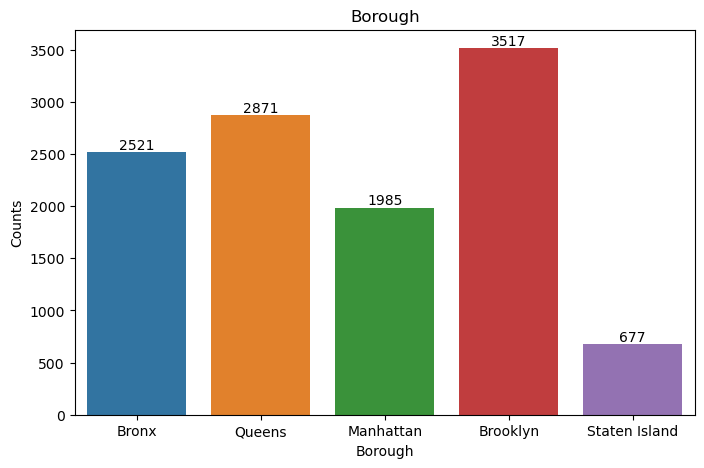

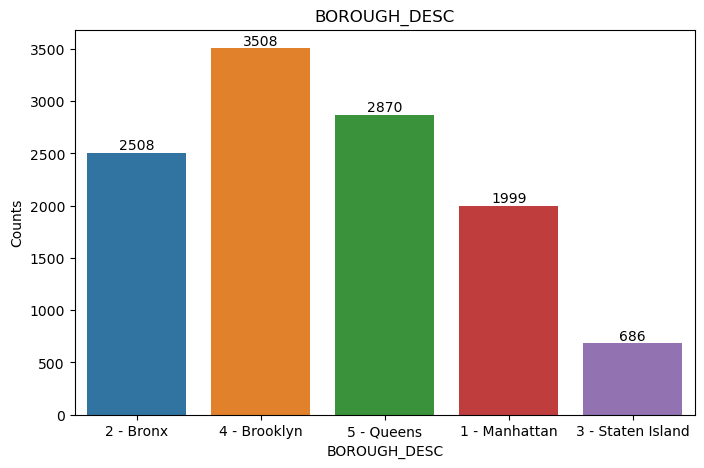

In [69]:
#Catogerical columns analysis
for i in ['Borough', 'BOROUGH_DESC']:
    fig, ax = plt.subplots(figsize = (8,5))
    sns.countplot(ax = ax, data = merged_respond_causes, x = merged_respond_causes[i])
    ax.set(ylabel='Counts', title=i)
    ax.bar_label(ax.containers[0])

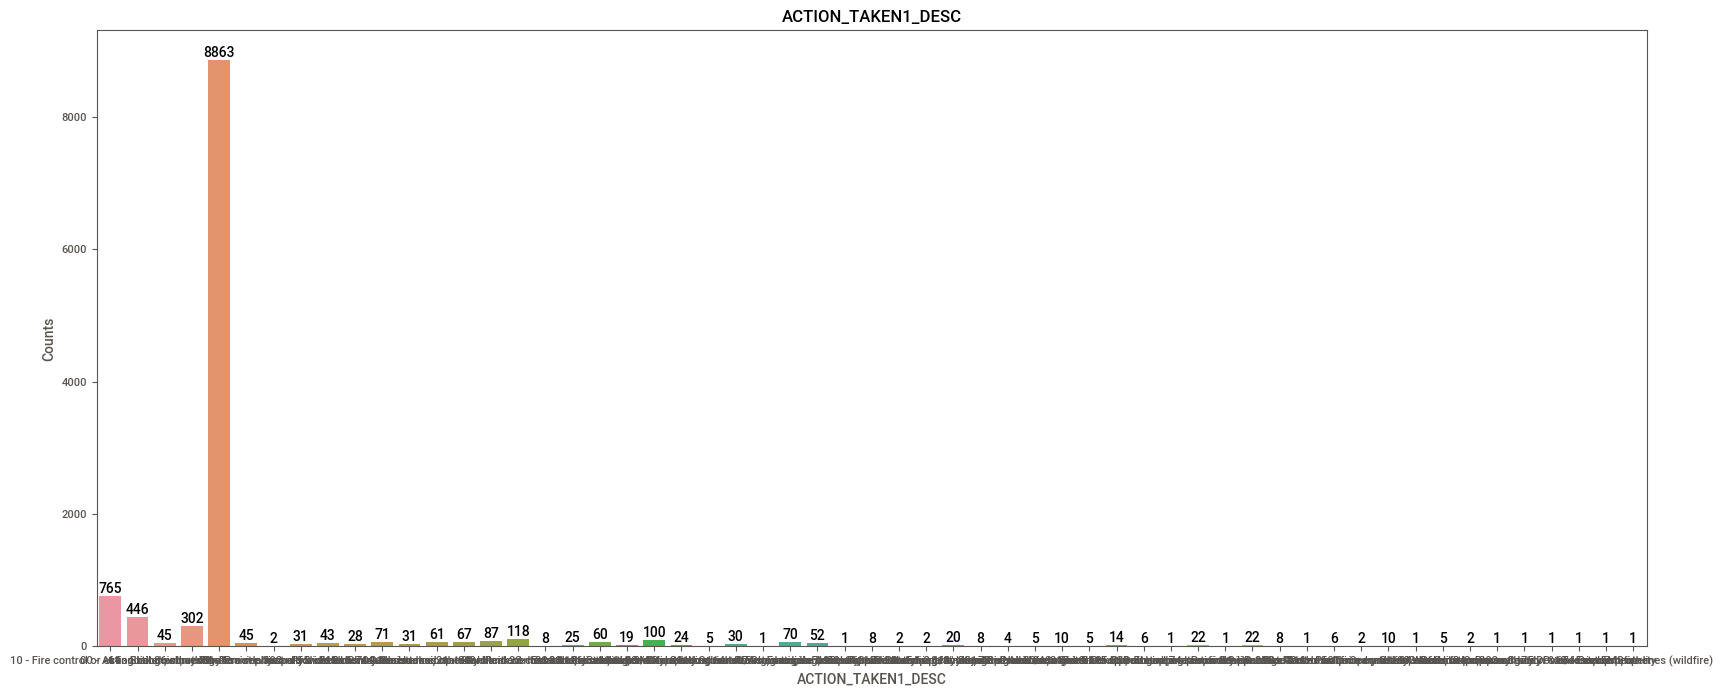

In [111]:
#Catogerical columns analysis
for i in ['ACTION_TAKEN1_DESC']:
    fig, ax = plt.subplots(figsize = (20,8))
    sns.countplot(ax = ax, data = merged_respond_causes, x = merged_respond_causes[i])
    ax.set(ylabel='Counts', title=i)
    ax.bar_label(ax.containers[0])

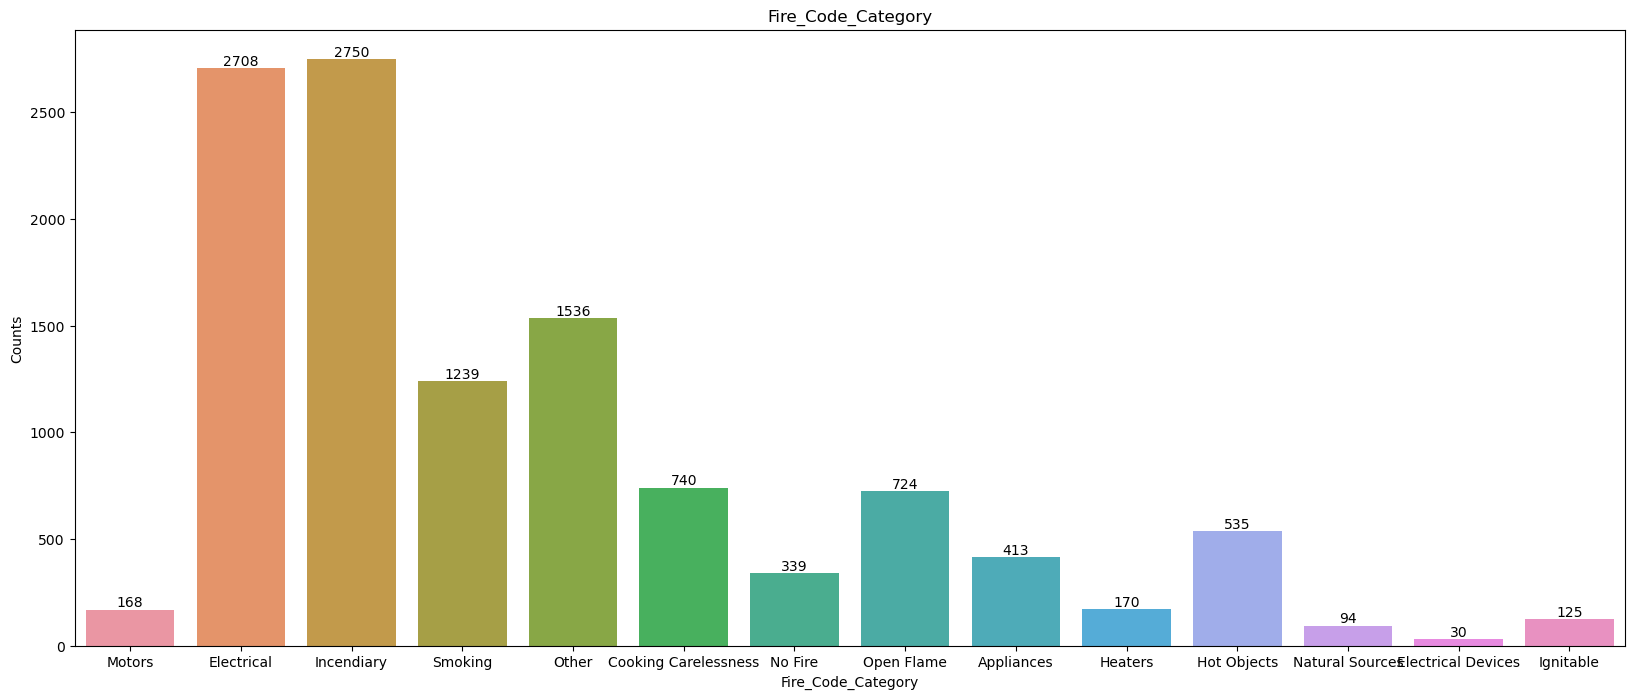

In [84]:
#Catogerical columns analysis
for i in ['Fire_Code_Category']:
    fig, ax = plt.subplots(figsize = (20,8))
    sns.countplot(ax = ax, data = merged_respond_causes, x = merged_respond_causes[i])
    ax.set(ylabel='Counts', title=i)
    ax.bar_label(ax.containers[0])

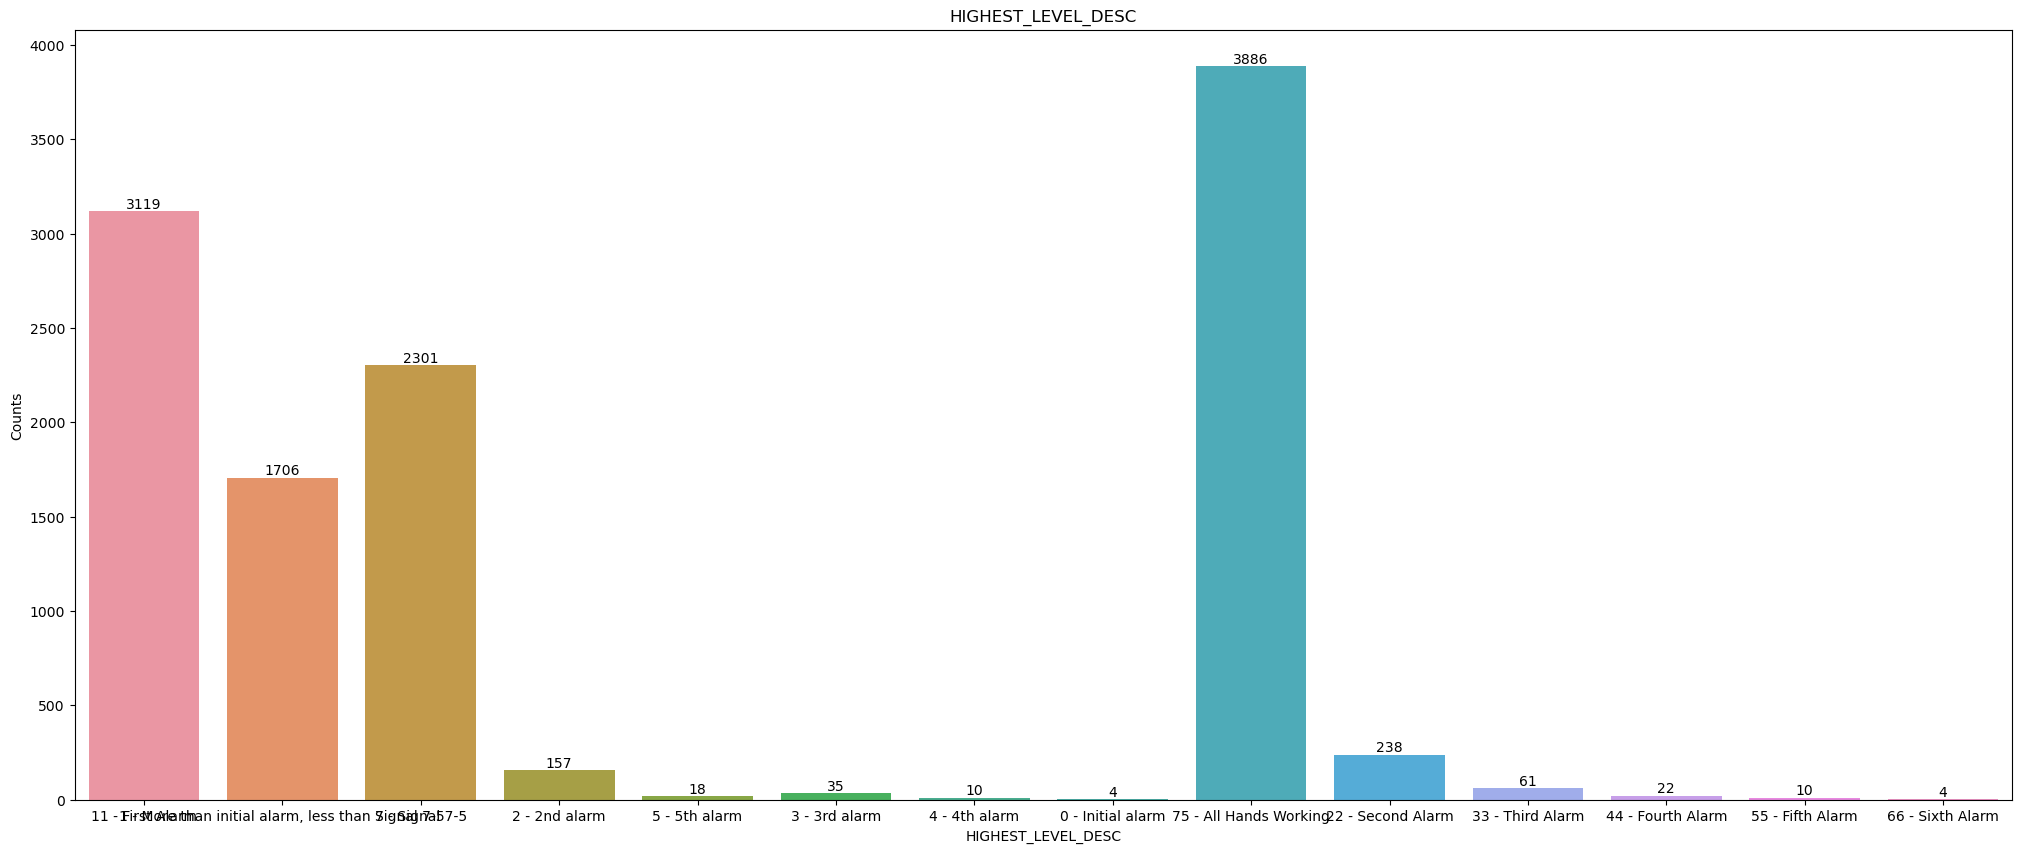

In [90]:
#Catogerical columns analysis
for i in ['HIGHEST_LEVEL_DESC']:
    fig, ax = plt.subplots(figsize = (25,10))
    sns.countplot(ax = ax, data = merged_respond_causes, x = merged_respond_causes[i])
    ax.set(ylabel='Counts', title=i)
    ax.bar_label(ax.containers[0])

In [93]:
filtered = merged_respond_causes[merged_respond_causes['Fire_Code_Category']=='Electrical'].groupby('Borough').size().nlargest(10).sort_values(ascending=False).reset_index(name='count')
filtered

,Borough,count
0,Brooklyn,905
1,Queens,786
2,Bronx,506
3,Manhattan,395
4,Staten Island,116


In [94]:
filtered = merged_respond_causes[merged_respond_causes['Fire_Code_Category']=='Incendiary'].groupby('Borough').size().nlargest(10).sort_values(ascending=False).reset_index(name='count')
filtered

,Borough,count
0,Brooklyn,859
1,Bronx,735
2,Queens,531
3,Manhattan,468
4,Staten Island,157


In [112]:
filtered = merged_respond_causes[merged_respond_causes['Fire_Code_Category']=='Incendiary'].groupby('ACTION_TAKEN1_DESC').size().nlargest(10).sort_values(ascending=False).reset_index(name='count')
filtered

,ACTION_TAKEN1_DESC,count
0,11 - Extinguishment by fire service personnel,2074
1,"10 - Fire control or extinguishment, other",234
2,86 - Investigate,110
3,"00 - Action taken, other",60
4,87 - Investigate fire out on arrival,34
5,"112 - Stretch 1 3/4"" line, extinguish fire",32
6,81 - Incident command,29
7,215 - Check for extension,25
8,111 - Hooked up to hydrant,24
9,21 - Search,18


In [113]:
filtered = merged_respond_causes[merged_respond_causes['Fire_Code_Category']=='Electrical'].groupby('ACTION_TAKEN1_DESC').size().nlargest(10).sort_values(ascending=False).reset_index(name='count')
filtered

,ACTION_TAKEN1_DESC,count
0,11 - Extinguishment by fire service personnel,2372
1,"10 - Fire control or extinguishment, other",145
2,"00 - Action taken, other",33
3,53 - Evacuate area,20
4,86 - Investigate,20
5,82 - Notify other agencies.,18
6,"112 - Stretch 1 3/4"" line, extinguish fire",16
7,81 - Incident command,14
8,111 - Hooked up to hydrant,7
9,64 - Shut down system,6


In [99]:
filtered = merged_respond_causes[merged_respond_causes['Borough']=='Brooklyn'].groupby('Fire_Code_Category').size().nlargest(10).sort_values(ascending=False).reset_index(name='count')
filtered

,Fire_Code_Category,count
0,Electrical,905
1,Incendiary,859
2,Other,385
3,Smoking,373
4,Cooking Carelessness,229
5,Open Flame,223
6,Hot Objects,167
7,Appliances,108
8,No Fire,99
9,Motors,49


In [100]:
filtered = merged_respond_causes[merged_respond_causes['Borough']=='Queens'].groupby('Fire_Code_Category').size().nlargest(10).sort_values(ascending=False).reset_index(name='count')
filtered

,Fire_Code_Category,count
0,Electrical,786
1,Incendiary,531
2,Other,419
3,Smoking,267
4,Cooking Carelessness,205
5,Open Flame,188
6,Hot Objects,121
7,Appliances,119
8,No Fire,75
9,Heaters,43


In [101]:
filtered = merged_respond_causes[merged_respond_causes['Borough']=='Bronx'].groupby('Fire_Code_Category').size().nlargest(10).sort_values(ascending=False).reset_index(name='count')
filtered

,Fire_Code_Category,count
0,Incendiary,735
1,Electrical,506
2,Other,318
3,Smoking,304
4,Open Flame,171
5,Cooking Carelessness,132
6,Hot Objects,98
7,Appliances,73
8,No Fire,62
9,Heaters,41


In [67]:
merged_respond_causes.head()

,FIRE_BOX,INCIDENT_TYPE_DESC,Incident_DateTime,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,STREET_HIGHWAY,ZIP_CODE,BOROUGH_DESC,Borough,Battalion,Incident_Classification,Cause_Fire_Description,Fire_Code_Category,Dates,Time
0,4768,"100 - Fire, other",07/31/2018 02:20:24 AM,07/31/2018 02:25:10 AM,8.0,07/31/2018 03:06:18 AM,11 - First Alarm,2754.0,"10 - Fire control or extinguishment, other",MACOMBS RD,10453,2 - Bronx,Bronx,19,MD Residential Structure,Motors - Electric,Motors,2018-07-31,02:20:24
1,3996,736 - CO detector activation due to malfunction,08/05/2018 06:55:04 AM,08/05/2018 07:00:04 AM,2.0,08/05/2018 07:06:50 AM,11 - First Alarm,706.0,"00 - Action taken, other",E 35 ST,11234,4 - Brooklyn,Queens,52,MD Residential Structure,Electrical Wiring,Electrical,2018-08-05,06:55:04
2,1048,"300 - Rescue, EMS incident, other",08/25/2018 04:25:53 PM,08/25/2018 04:29:08 PM,1.0,08/25/2018 04:36:17 PM,11 - First Alarm,624.0,"00 - Action taken, other",CENTRAL AVE,11691,5 - Queens,Manhattan,04,Vehicle,Incendiary,Incendiary,2018-08-25,16:25:53
3,821,522 - Water or steam leak,09/11/2018 05:56:23 PM,09/11/2018 06:02:03 PM,1.0,09/11/2018 06:05:01 PM,11 - First Alarm,518.0,64 - Shut down system,W 46 ST,10036,1 - Manhattan,Manhattan,06,MD Residential Structure,Service,Electrical,2018-09-11,17:56:23
4,872,481 - Attempt to burn,09/14/2018 03:47:38 AM,09/14/2018 03:50:57 AM,6.0,09/14/2018 04:27:39 AM,11 - First Alarm,2401.0,86 - Investigate,RALPH AVE,11233,4 - Brooklyn,Brooklyn,37,Commercial Structure,Incendiary - Ignitable Liquid,Incendiary,2018-09-14,03:47:38


In [103]:
import sweetviz as sv

my_report = sv.analyze(merged_respond_causes)

                                             |          | [  0%]   00:00 -> (? left)

In [105]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



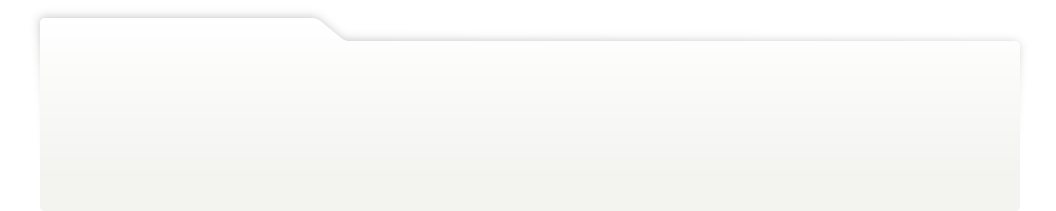
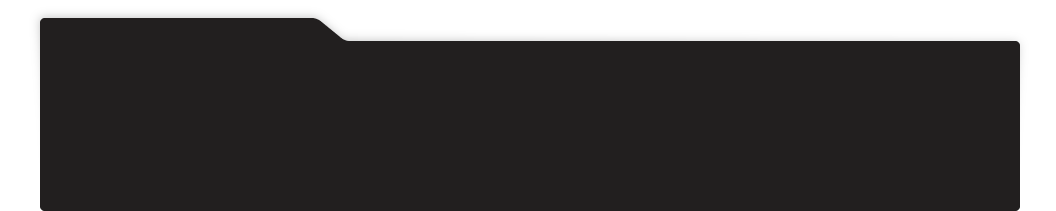
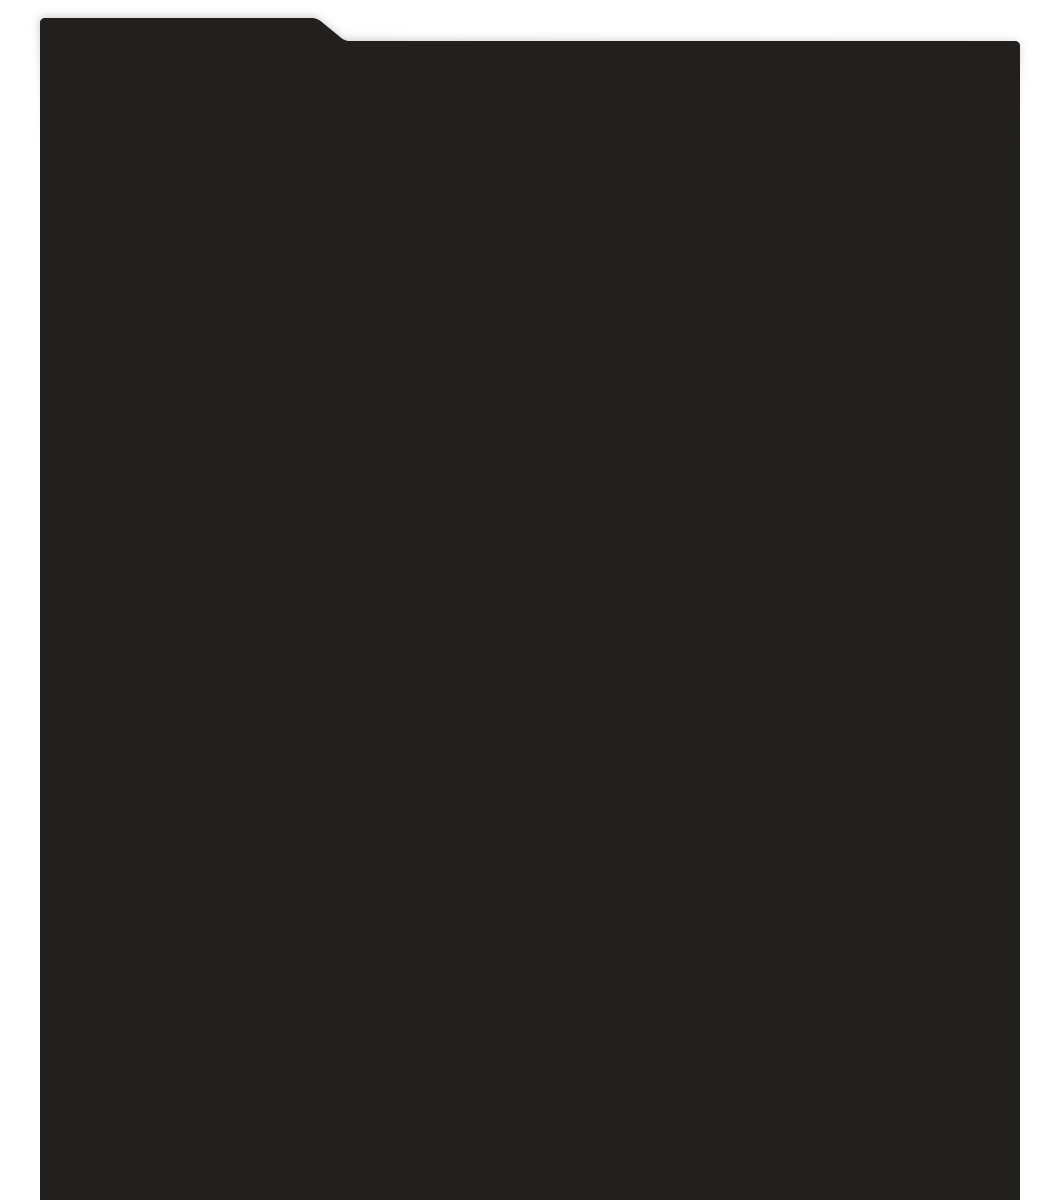
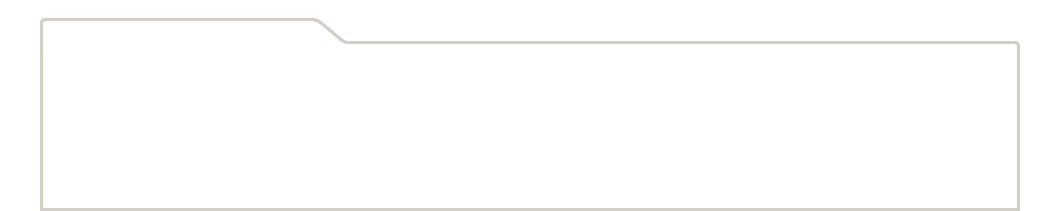
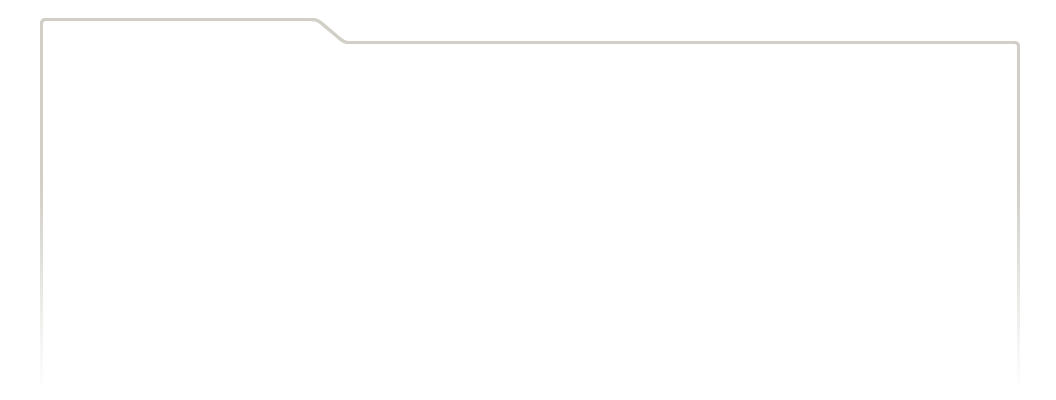
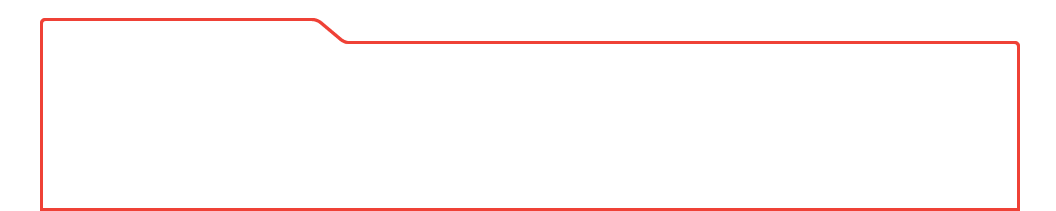
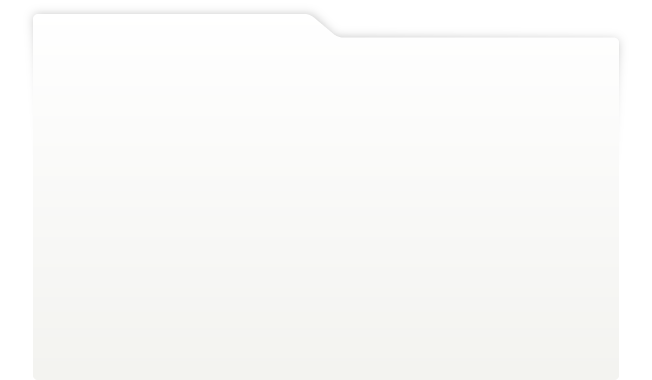
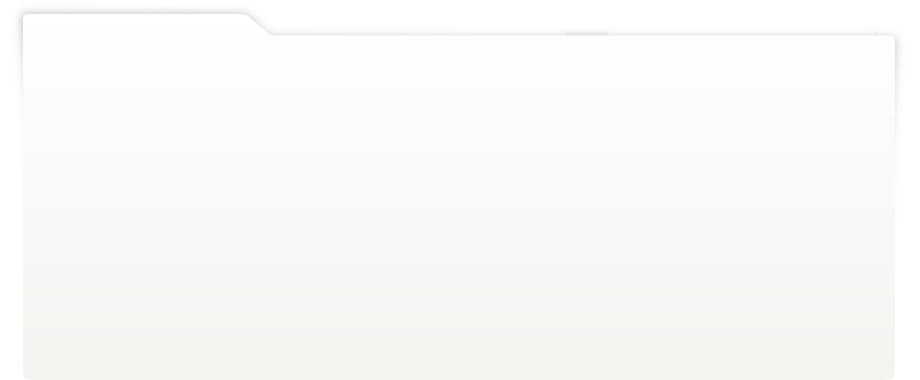
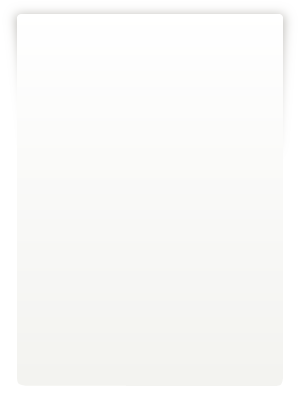
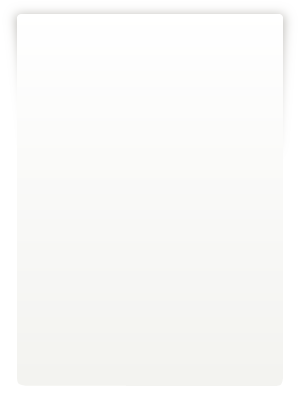
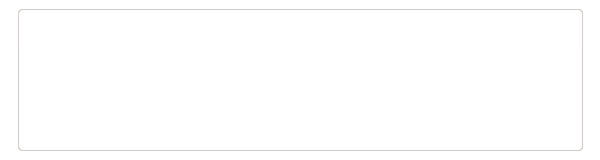
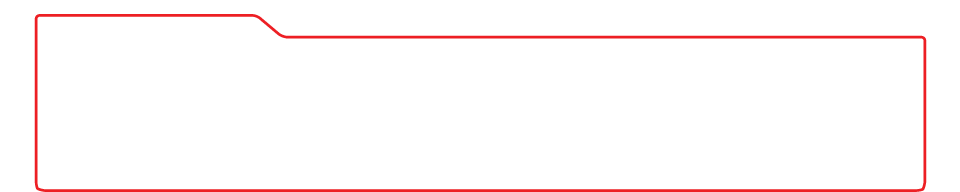
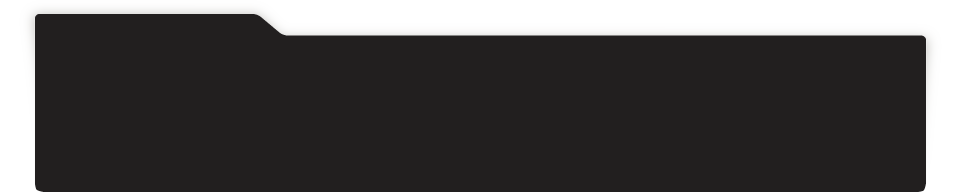
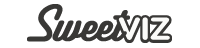
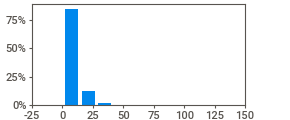
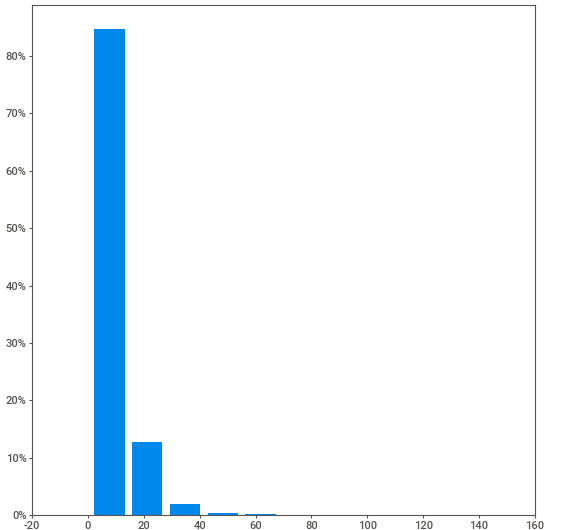
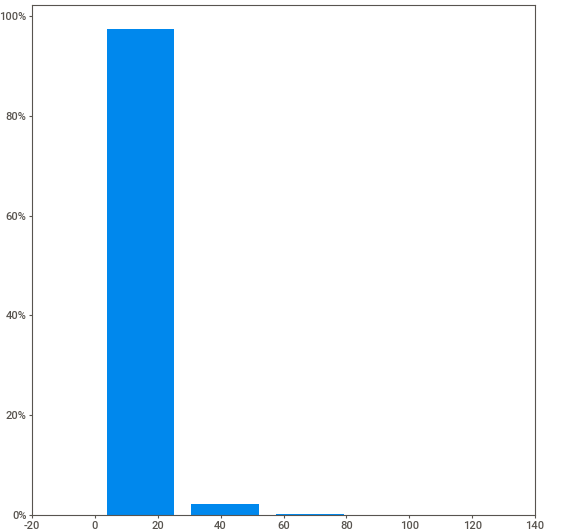
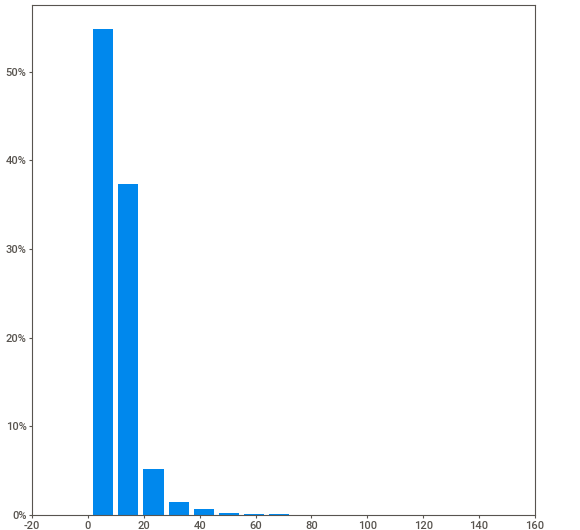
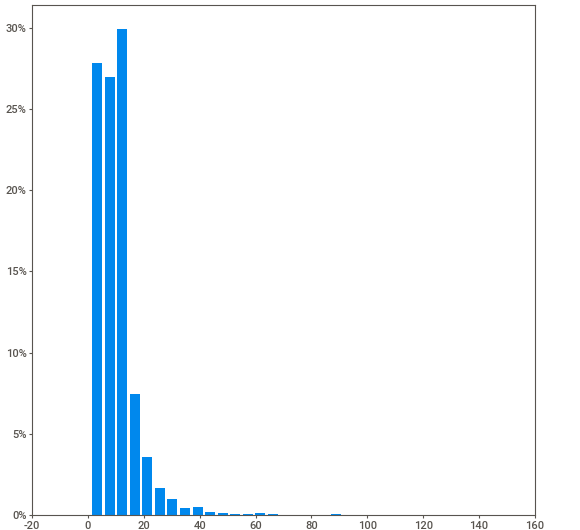
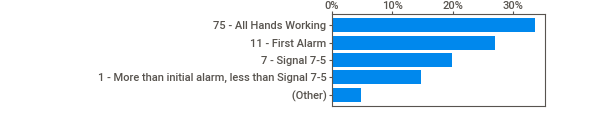
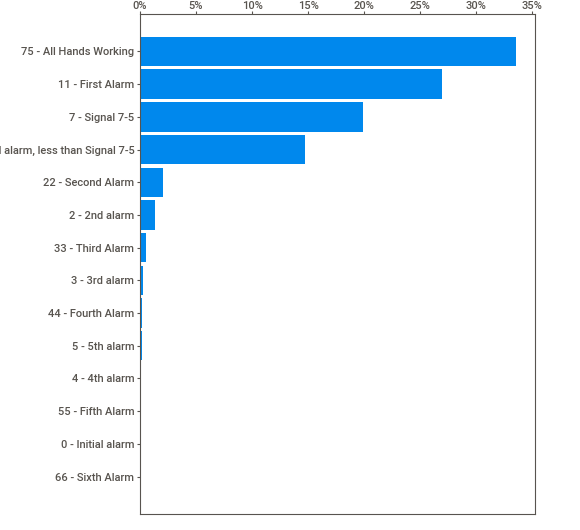
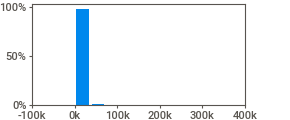
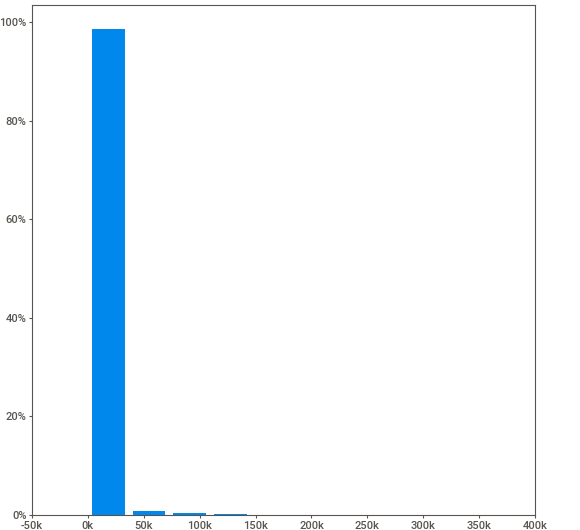
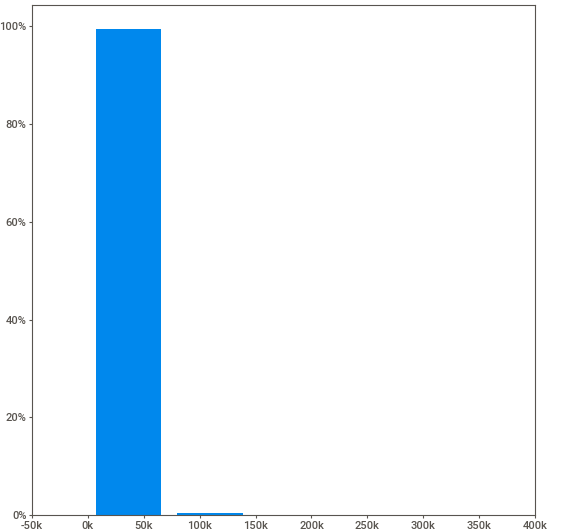
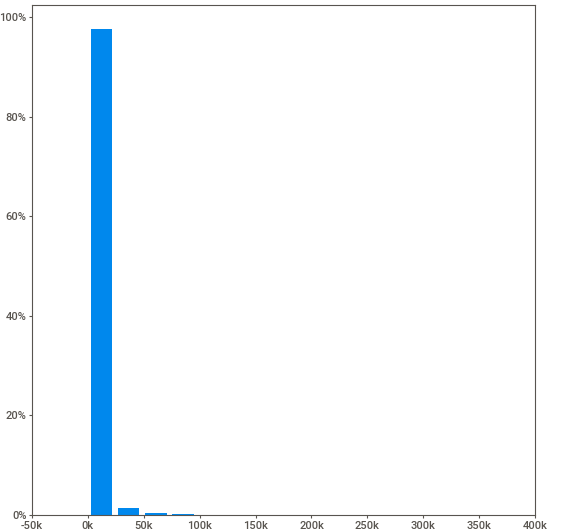
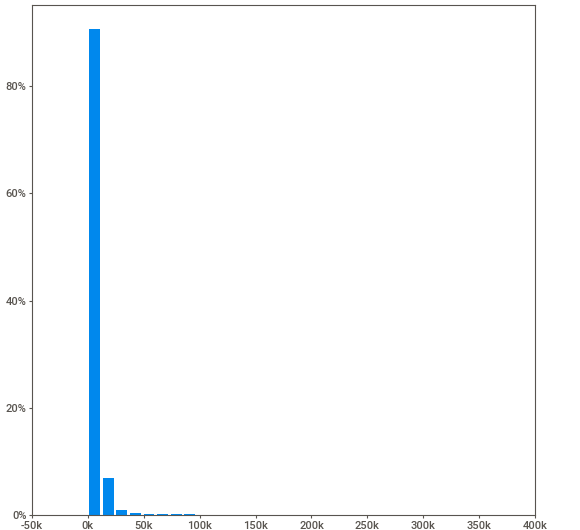
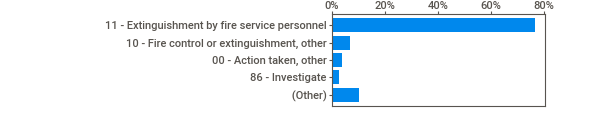
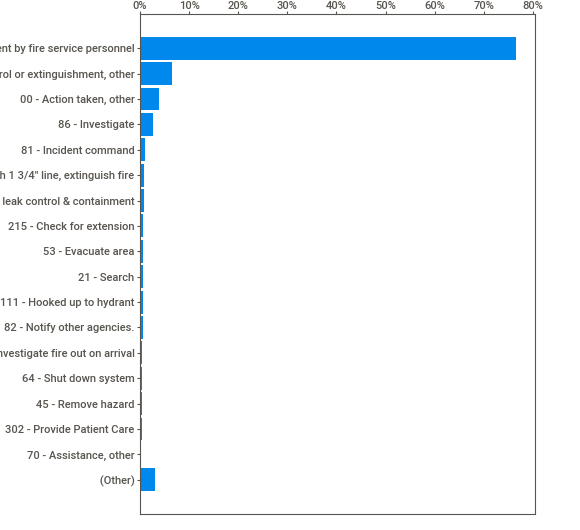
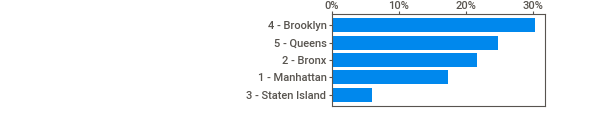
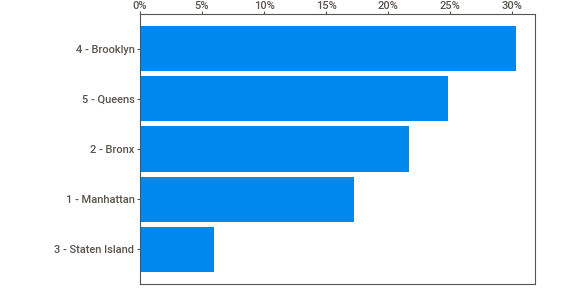
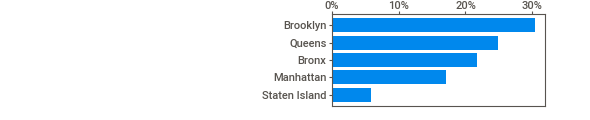
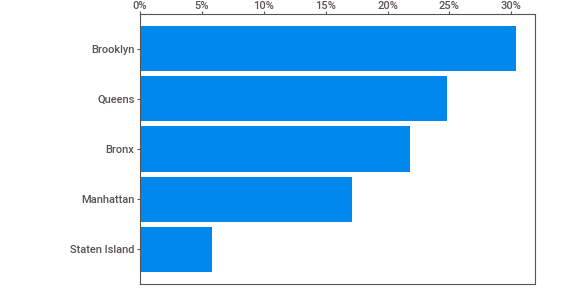
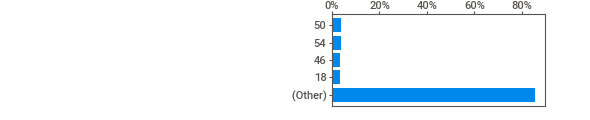
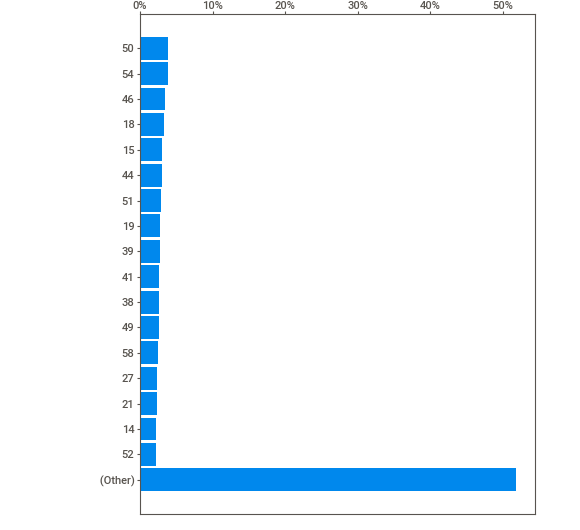
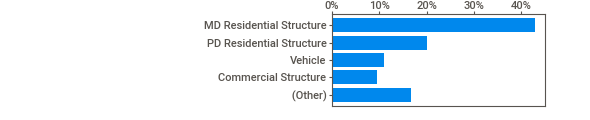
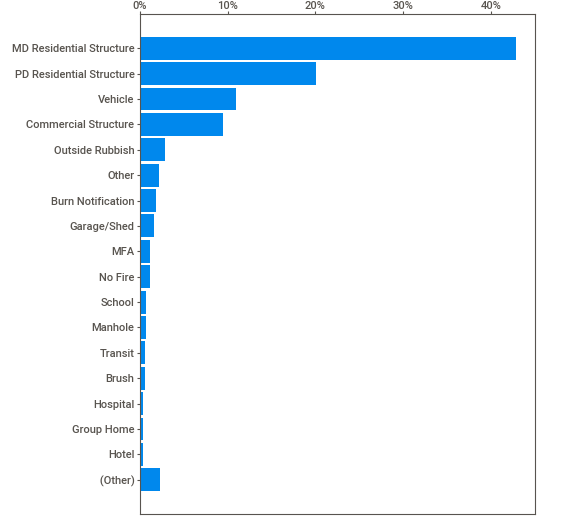
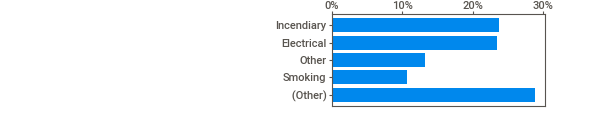
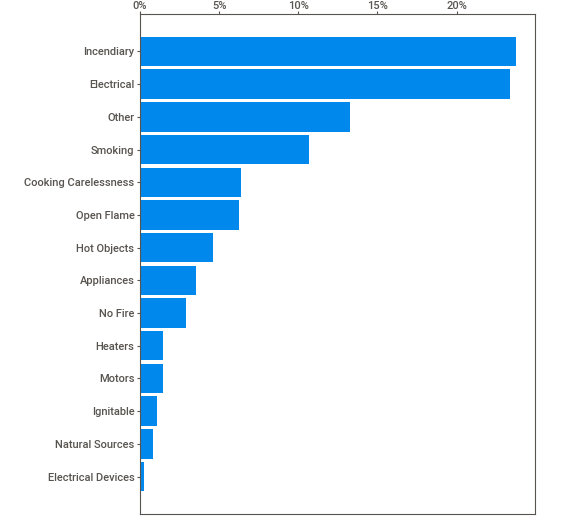
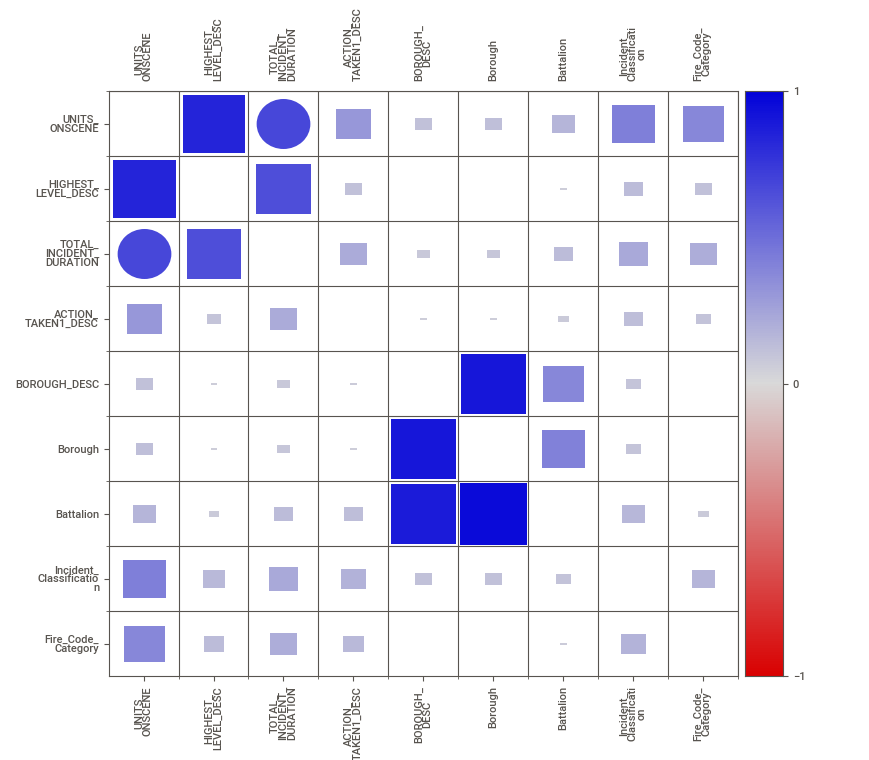
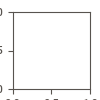

In [107]:
my_report.show_notebook(  w=None, 
                h=None, 
                scale=None,
                layout='widescreen',
                filepath=None)

In [108]:
import sweetviz as sv

my_report = sv.analyze(Listings)

                                             |          | [  0%]   00:00 -> (? left)


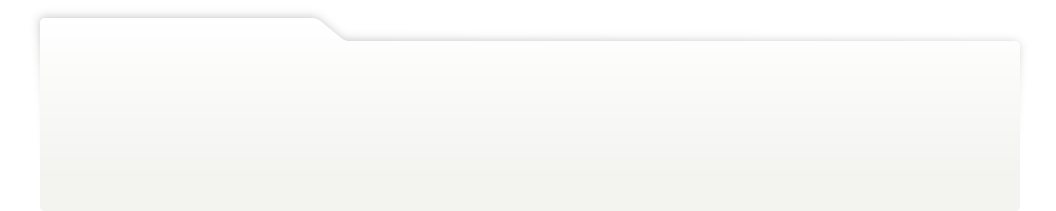
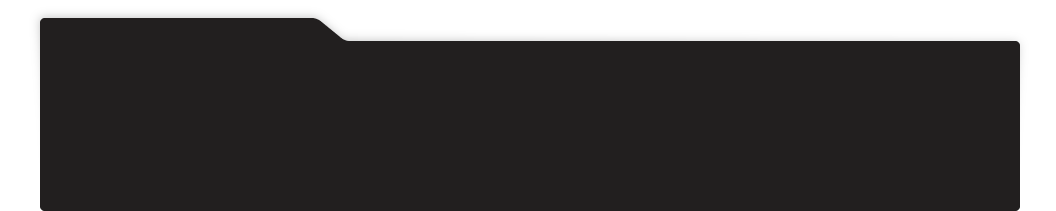
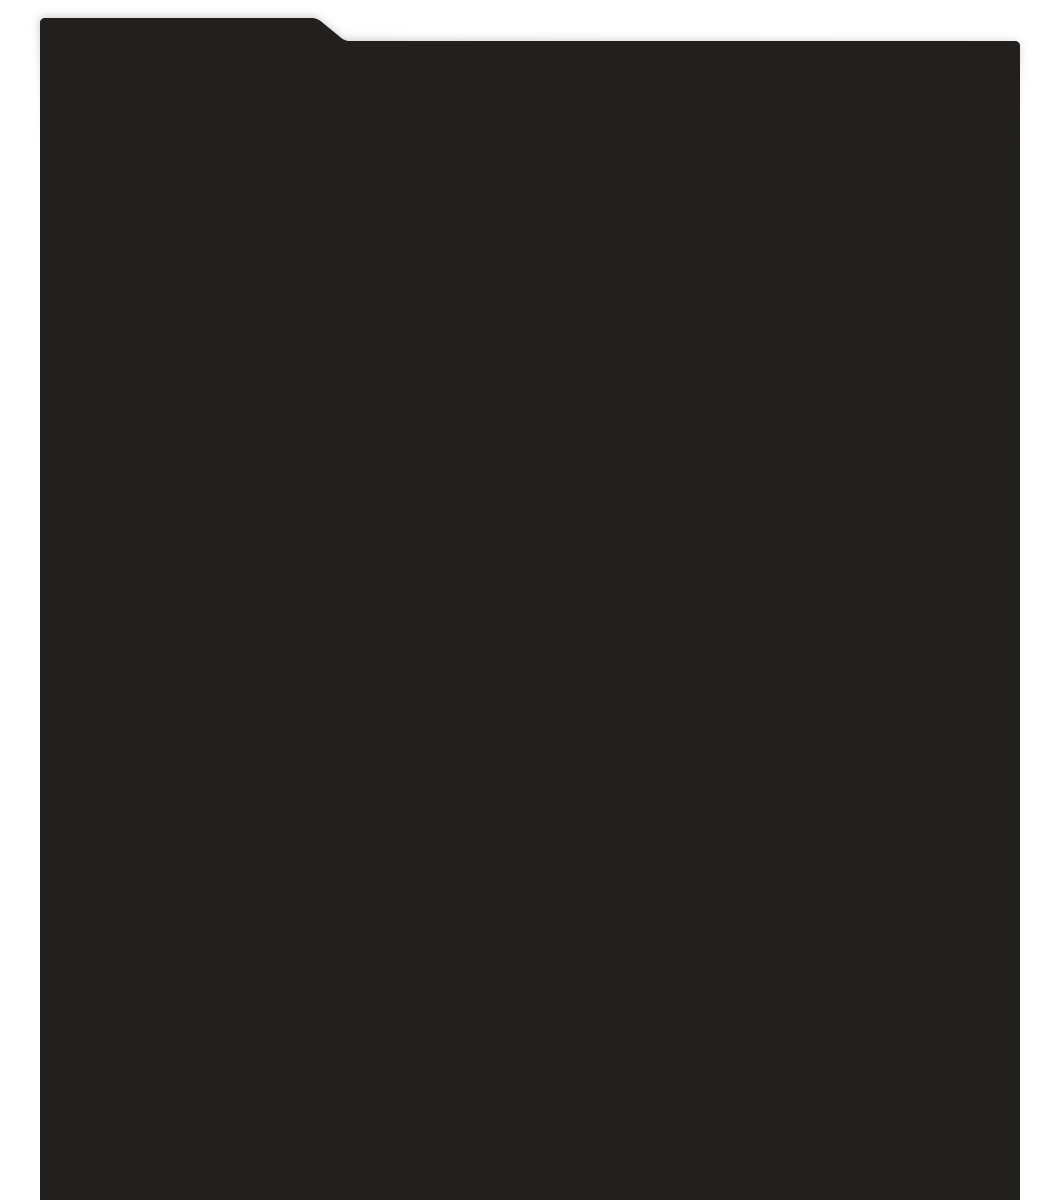
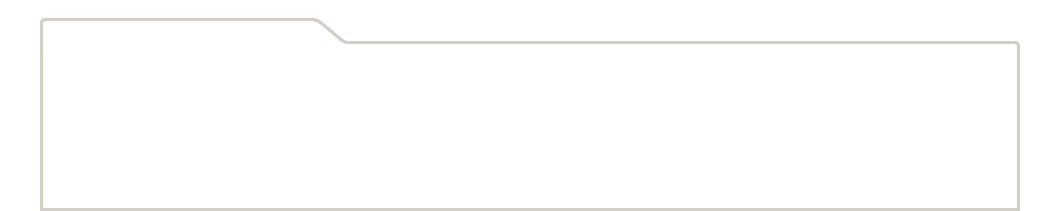
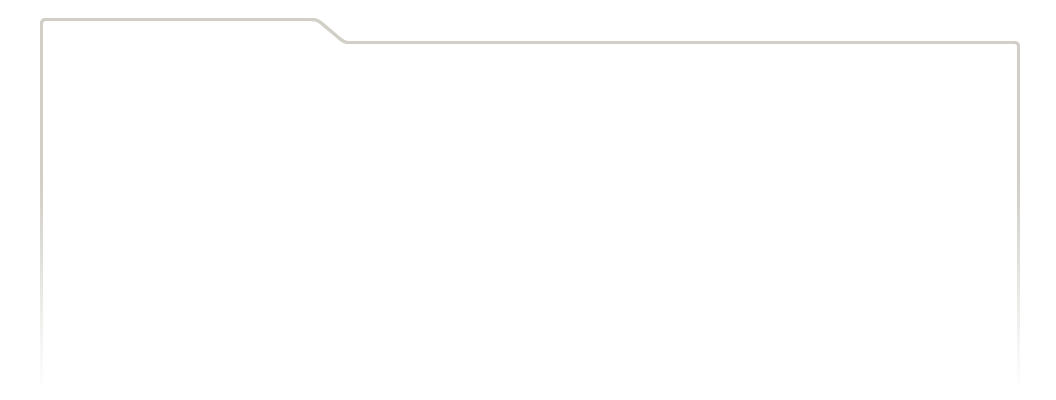
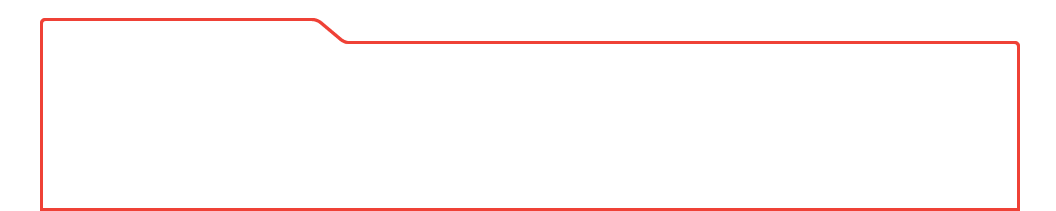
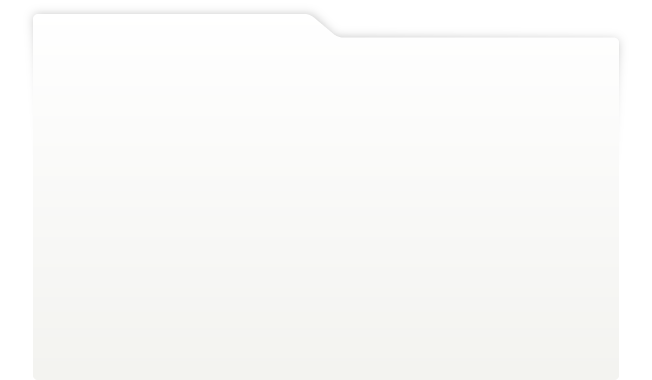
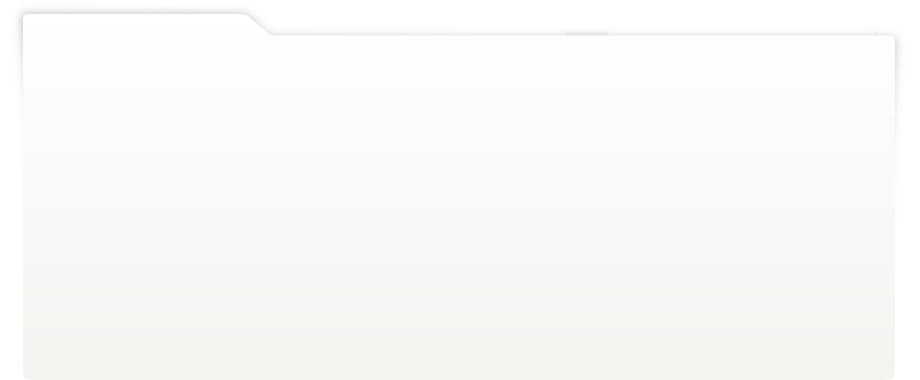
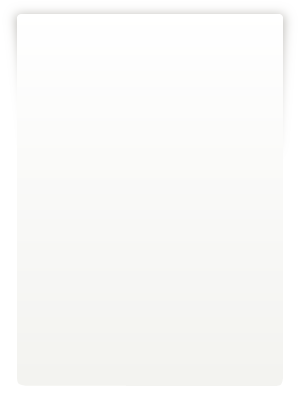
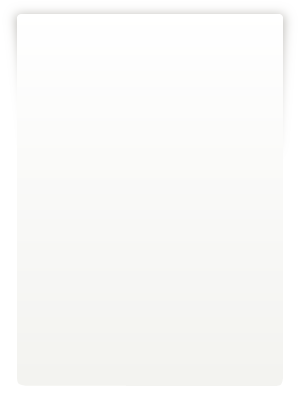
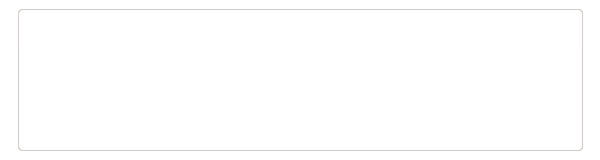
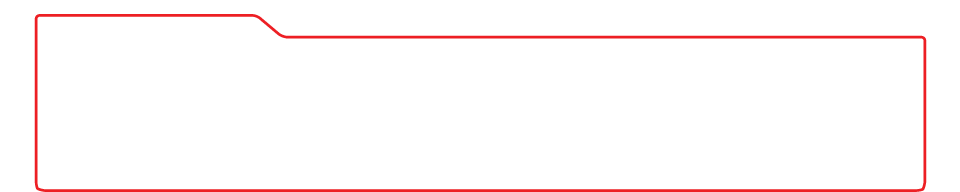
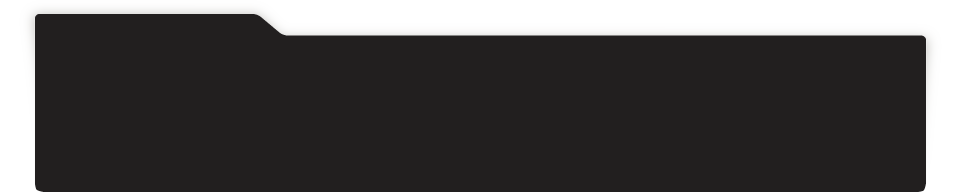
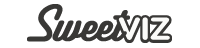
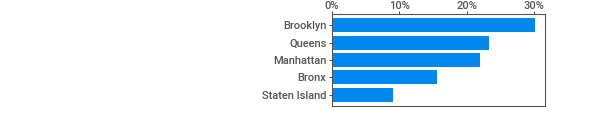
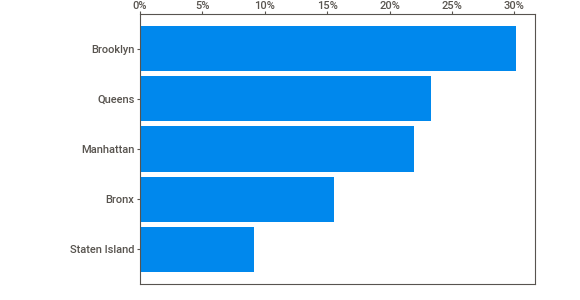
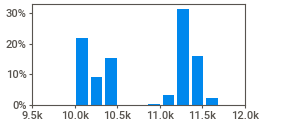
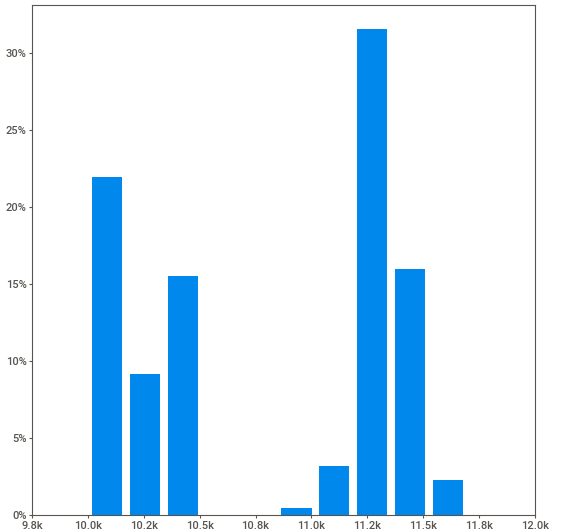
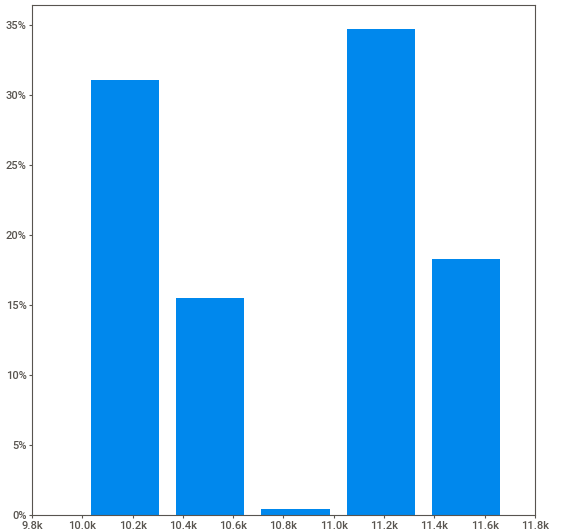
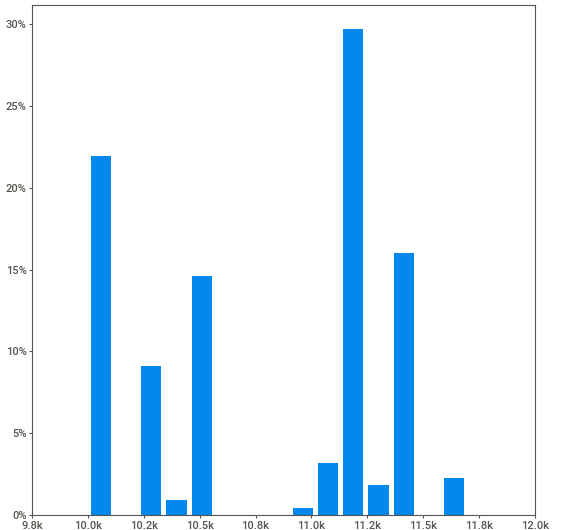
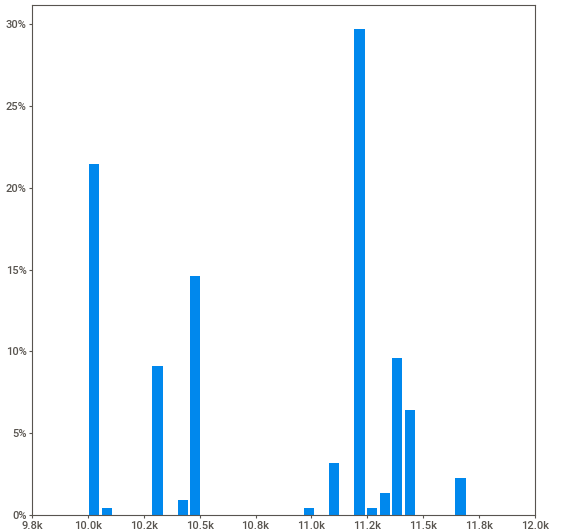
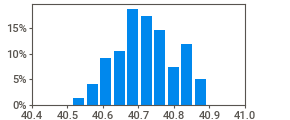
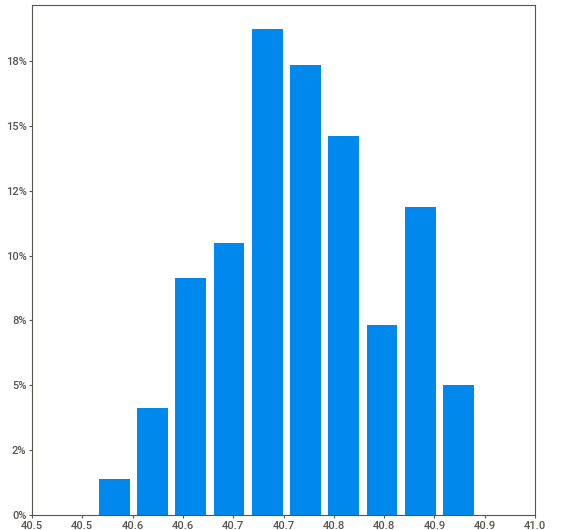
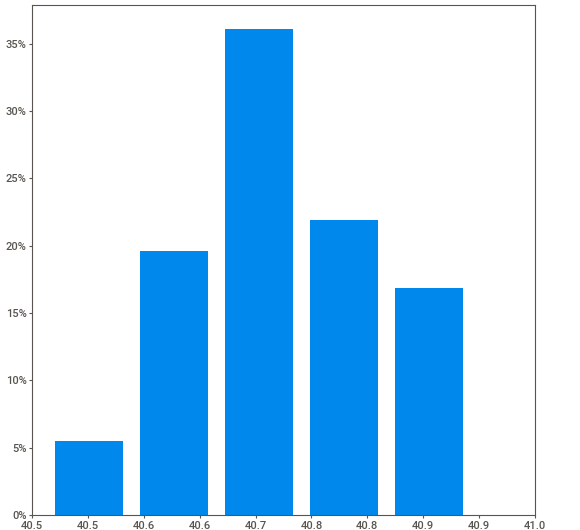
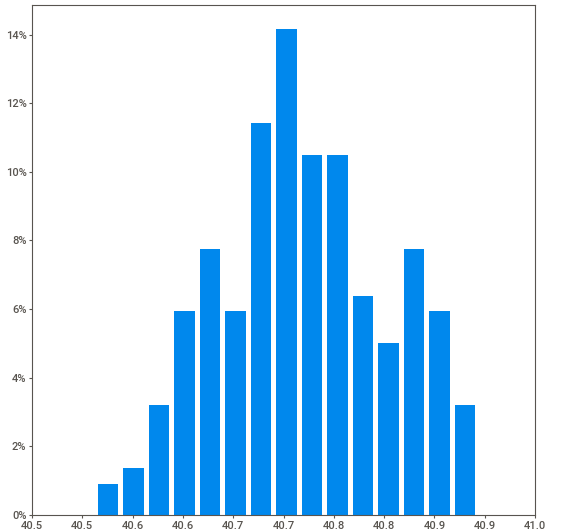
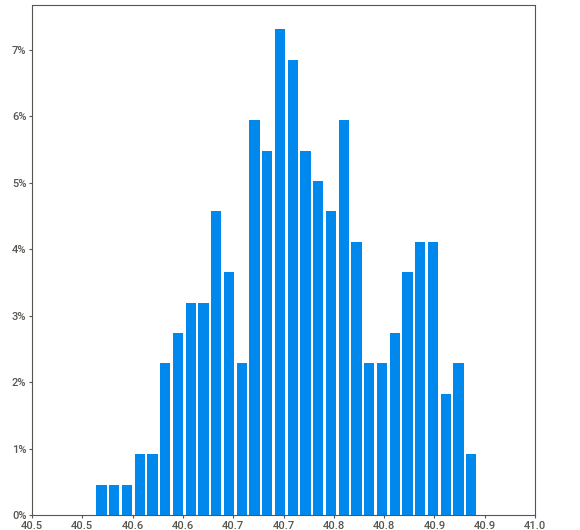
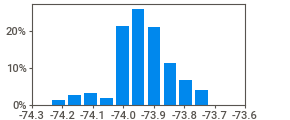
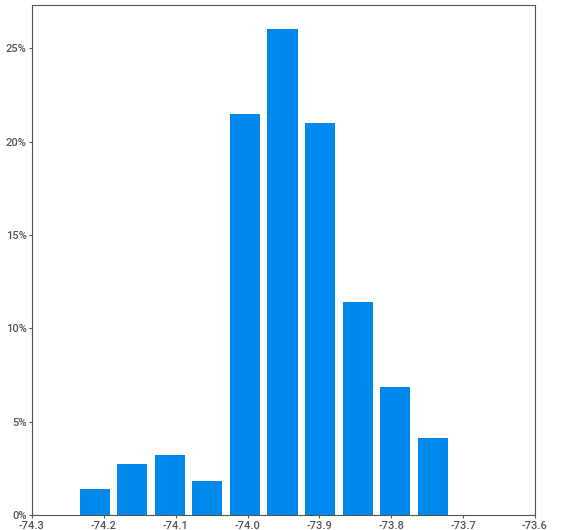
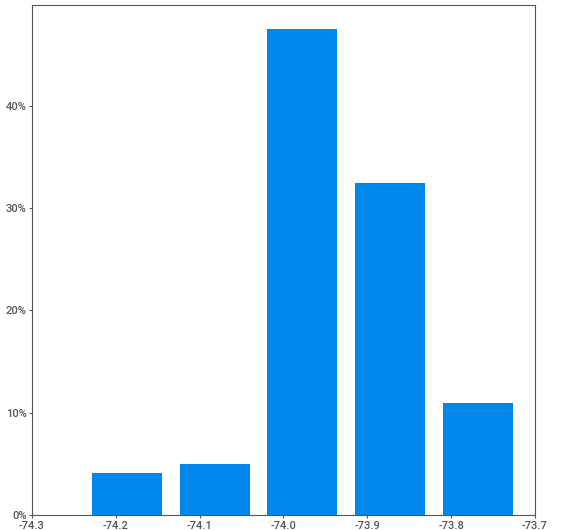
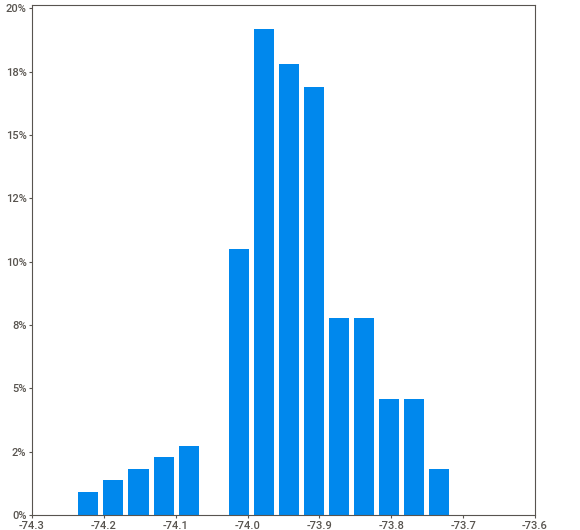
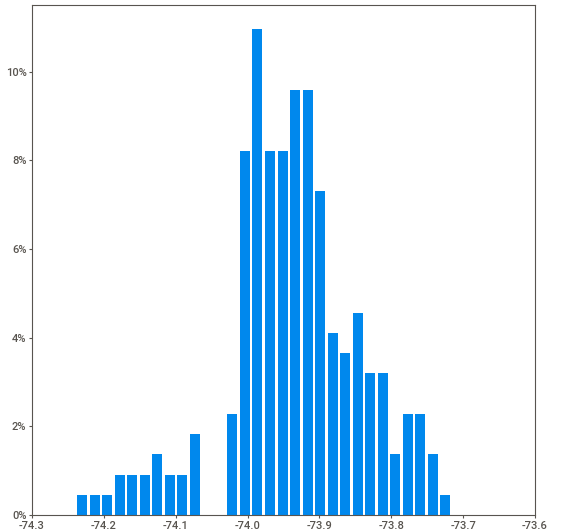
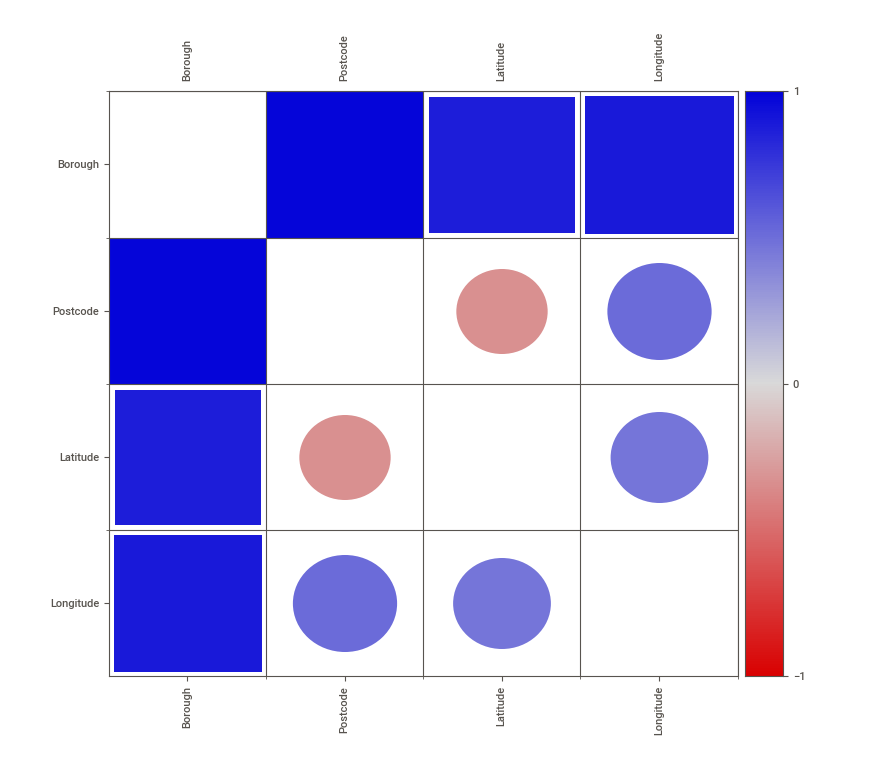
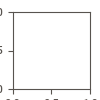

In [109]:
my_report.show_notebook(  w=None, 
                h=None, 
                scale=None,
                layout='widescreen',
                filepath=None)